** UK Optimal Product Price Prediction Dataset **

In [42]:
import kagglehub
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


In [43]:
### (1) Load data

# Download latest version
path = kagglehub.dataset_download("asaniczka/uk-optimal-product-price-prediction")

print("Path to dataset files:", path)

Path to dataset files: C:\Users\yannik_sassmann\.cache\kagglehub\datasets\asaniczka\uk-optimal-product-price-prediction\versions\3


In [ ]:
# Load dataset

df = pd.read_csv("amz_uk_price_prediction_dataset.csv")
df.head(5)

,uid,asin,title,stars,reviews,price,isBestSeller,boughtInLastMonth,category
0,1,B09B96TG33,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
1,2,B01HTH3C8S,"Anker Soundcore mini, Super-Portable Bluetooth...",4.7,98099,23.99,True,0,Hi-Fi Speakers
2,3,B09B8YWXDF,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
3,4,B09B8T5VGV,"Echo Dot with clock (5th generation, 2022 rele...",4.7,7205,31.99,False,0,Hi-Fi Speakers
4,5,B09WX6QD65,Introducing Echo Pop | Full sound compact Wi-F...,4.6,1881,17.99,False,0,Hi-Fi Speakers


In [ ]:
### (2) Inspect dataset
df.shape

,count,mean,std,min,25%,50%,75%,max
uid,2443651.0,1370545.3,816056.2,1.0,658921.5,1349029.0,2060685.5,2828593.0
stars,2443651.0,2.2,2.2,0.0,0.0,0.0,4.4,5.0
reviews,2443651.0,480.6,5944.1,0.0,0.0,0.0,59.0,1356658.0
price,2443651.0,89.2,345.6,0.0,10.0,19.1,46.0,100000.0
boughtInLastMonth,2443651.0,25.9,240.5,0.0,0.0,0.0,0.0,50000.0


In [ ]:
round(df.describe().T, 1)

In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2443651 entries, 0 to 2443650
Data columns (total 9 columns):
 #   Column             Dtype  
---  ------             -----  
 0   uid                int64  
 1   asin               object 
 2   title              object 
 3   stars              float64
 4   reviews            int64  
 5   price              float64
 6   isBestSeller       bool   
 7   boughtInLastMonth  int64  
 8   category           object 
dtypes: bool(1), float64(2), int64(3), object(3)
memory usage: 151.5+ MB


In [ ]:
# Check for missing values

df.isna().sum()

uid                  0
asin                 0
title                0
stars                0
reviews              0
price                0
isBestSeller         0
boughtInLastMonth    0
category             0
dtype: int64

In [27]:
# Check for duplicates

df.duplicated().sum()

np.int64(0)

In [29]:
# Check for empty values

spaced_values=df.eq(" ").sum()
spaced_values

uid                  0
asin                 0
title                0
stars                0
reviews              0
price                0
isBestSeller         0
boughtInLastMonth    0
category             0
dtype: int64

In [ ]:
### Part 1: Understanding Product Categories

# Business Question: What are the most popular product categories on Amazon UK, and how do they compare in terms of listing frequency?

#    Frequency Tables:
#        Generate a frequency table for the product category.
#        Which are the top 5 most listed product categories?

#    Visualizations:
#       Display the distribution of products across different categories using a bar chart. If you face problems understanding the chart, do it for a subset of top categories.
#       For a subset of top categories, visualize their proportions using a pie chart. Does any category dominate the listings?

In [31]:
# Get unique values for category

df["category"].unique()

array(['Hi-Fi Speakers', 'CD, Disc & Tape Players', 'Wearable Technology',
       'Light Bulbs', 'Bathroom Lighting',
       'Heating, Cooling & Air Quality', 'Coffee & Espresso Machines',
       'Lab & Scientific Products', 'Smart Speakers',
       'Motorbike Clothing', 'Motorbike Accessories',
       'Motorbike Batteries', 'Motorbike Boots & Luggage',
       'Motorbike Chassis', 'Handmade Home & Kitchen Products',
       'Hardware', 'Storage & Home Organisation',
       'Fireplaces, Stoves & Accessories', 'PC Gaming Accessories',
       'USB Gadgets', 'Blank Media Cases & Wallets', 'Car & Motorbike',
       'Boys', 'Sports & Outdoors', 'Microphones', 'String Instruments',
       'Karaoke Equipment', 'PA & Stage',
       'General Music-Making Accessories', 'Wind Instruments',
       'Handmade Gifts', 'Fragrances', 'Calendars & Personal Organisers',
       'Furniture & Lighting', 'Computer Printers', 'Ski Goggles',
       'Snowboards', 'Skiing Poles', 'Downhill Ski Boots',
       'Hiki

In [ ]:
# Generate a frequency table for the product category

frequency_table = df.category.value_counts()
proportion_table = df.category.value_counts(normalize=True).round(2)

df2 = pd.concat([frequency_table, proportion_table], axis=1)
df2.columns = ['absolute_frequency', 'relative_frequency']
df2

,absolute_frequency,relative_frequency
category,,
Sports & Outdoors,836265,0.34
Beauty,19312,0.01
"Handmade Clothing, Shoes & Accessories",19229,0.01
Bath & Body,19092,0.01
Birthday Gifts,18978,0.01
...,...,...
Motorbike Chassis,107,0.00
Alexa Built-In Devices,107,0.00
Plugs,107,0.00


In [ ]:
# Which are the top 5 most listed product categories?

df2.head(5)

,absolute_frequency,relative_frequency
category,,
Sports & Outdoors,836265,0.34
Beauty,19312,0.01
"Handmade Clothing, Shoes & Accessories",19229,0.01
Bath & Body,19092,0.01
Birthday Gifts,18978,0.01


C:\Users\yannik_sassmann\AppData\Local\Temp\ipykernel_30016\533817020.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


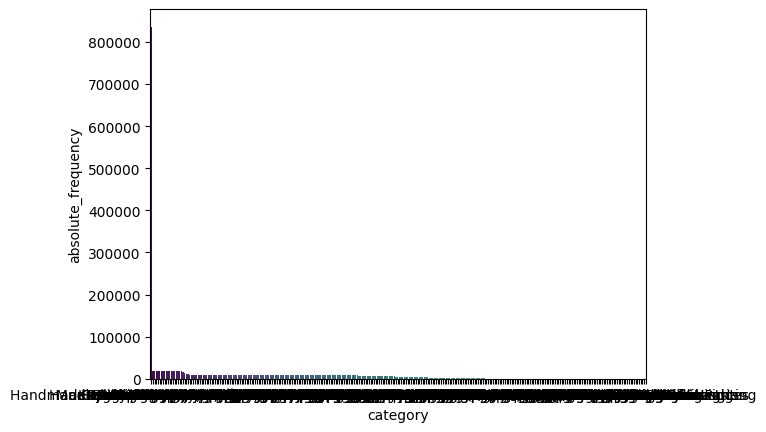

In [34]:
# Display the distribution of products across different categories using a bar chart. If you face problems understanding the chart, do it for a subset of top categories.

sns.barplot(
    x="category",
    y='absolute_frequency',
    data=df2,
    palette='viridis',
    legend=True,
)
plt.show()

C:\Users\yannik_sassmann\AppData\Local\Temp\ipykernel_30016\3153349452.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


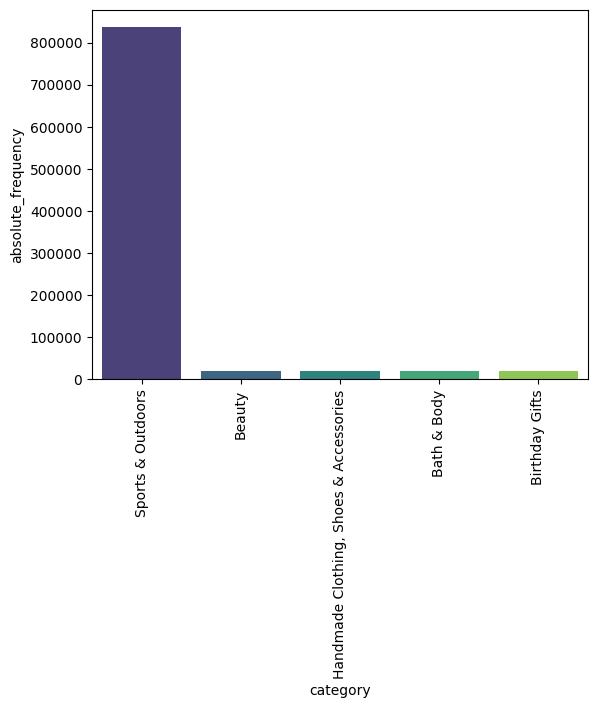

In [36]:
sns.barplot(
    x="category",
    y='absolute_frequency',
    data=df2.head(5),
    palette='viridis',
    legend=True,
)

plt.xticks(rotation=90)
plt.show()

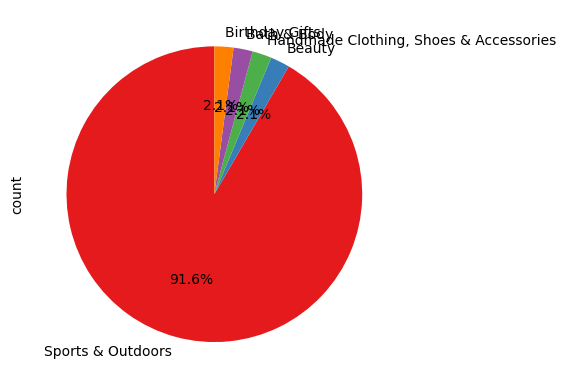

In [ ]:
#  For a subset of top categories, visualize their proportions using a pie chart. Does any category dominate the listings?

frequency_table.head(5).plot.pie(autopct='%1.1f%%' ,startangle=90, colors=sns.color_palette('Set1'))
plt.show()

# Yes, the sports and outdoors category dominates the category variable with a prevalance fot 91.6%.

In [ ]:
# Part 2: Delving into Product Pricing

# Business Question: How are products priced on Amazon UK, and are there specific price points or ranges that are more common?

#    Measures of Centrality:
#        Calculate the mean, median, and mode for the price of products.
#        What's the average price point of products listed? How does this compare with the most common price point (mode)?

#    Measures of Dispersion:
#        Determine the variance, standard deviation, range, and interquartile range for product price.
#        How varied are the product prices? Are there any indicators of a significant spread in prices?

#    Visualizations:
#        Is there a specific price range where most products fall? Plot a histogram to visualize the distribution of product prices. If its hard to read these diagrams, think why this is, and explain how it could be solved..
#        Are there products that are priced significantly higher than the rest? Use a box plot to showcase the spread and potential outliers in product pricing.

In [ ]:
# 2.1. Measures of Centrality

df["price"].describe()

count    2.443651e+06
mean     8.924381e+01
std      3.456089e+02
min      0.000000e+00
25%      9.990000e+00
50%      1.909000e+01
75%      4.599000e+01
max      1.000000e+05
Name: price, dtype: float64

In [51]:
# Mean
df["price"].mean()

np.float64(89.24380943923661)

In [ ]:
# Median
df["price"].median()

np.float64(19.09)

In [55]:
# Mode
df["price"].mode()

0    9.99
Name: price, dtype: float64

In [ ]:
# The average price per product is roughly 90 USD. The most common price per product however is 9.99. So the online story seems to sell a lot of small items.

In [ ]:
# 2.2. Measures of Dispersion

In [56]:
# Variance
df["price"].var()

np.float64(119445.48532254901)

In [57]:
# Standard Deviation
df["price"].std()

np.float64(345.60886175349873)

In [59]:
# Range
range = df["price"].max() - df["price"].min()
print(range)

100000.0


In [66]:
# Interquartile Range
IQR = df["price"].quantile(0.75) - df["price"].quantile(0.25)
print(IQR)

36.0


In [ ]:
# How varied are the product prices? Are there any indicators of a significant spread in prices?

# The variance and the range indicate quite a large spread of prices. The IQR however indicates that a majority of the products are in the around 36 USD. 


36.0


In [ ]:
# 2.3. Visualizations

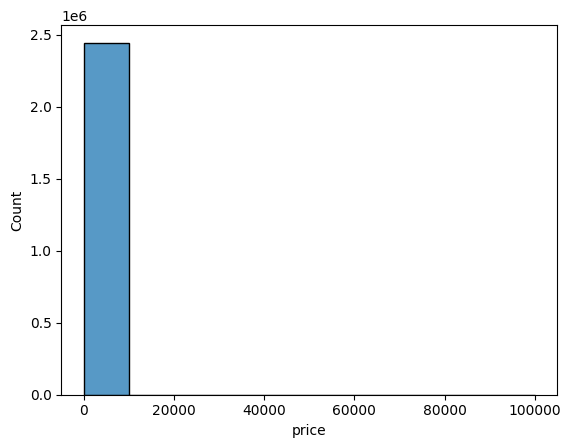

In [ ]:
# Historgram
sns.histplot(df.price, bins=10)
plt.show()

# The histogram is hard to read, as a majority of products fall in the price category below 1000 USD. So you have a few outliers to the right with much higher prices.
# You could remove outliers from the dataset to make the histogram more readible.

C:\Users\yannik_sassmann\AppData\Local\Temp\ipykernel_30016\3310837383.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, y="price", palette="coolwarm", legend=True)


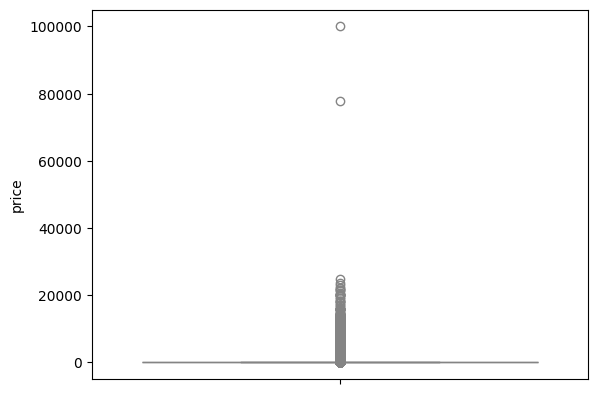

In [ ]:
# Boxplot
sns.boxplot(data=df, y="price", palette="coolwarm", legend=True)
plt.show()

In [ ]:
# Part 3: Unpacking Product Ratings

# Business Question: How do customers rate products on Amazon UK, and are there any patterns or tendencies in the ratings?

#    Measures of Centrality:
#        Calculate the mean, median, and mode for the rating of products.
#        How do customers generally rate products? Is there a common trend?

#    Measures of Dispersion:
#        Determine the variance, standard deviation, and interquartile range for product rating.
#        Are the ratings consistent, or is there a wide variation in customer feedback?

#    Shape of the Distribution:
#        Calculate the skewness and kurtosis for the rating column.
#        Are the ratings normally distributed, or do they lean towards higher or lower values?

#    Visualizations:
#        Plot a histogram to visualize the distribution of product ratings. Is there a specific rating that is more common?


In [ ]:
# 3.1. Measures of Centrality

In [84]:
# Mean
df["stars"].mean()

np.float64(2.152836472966066)

In [83]:
# Median
df["stars"].median()

np.float64(0.0)

In [82]:
# Mode
df["stars"].mode()

0    0.0
Name: stars, dtype: float64

In [ ]:
# The majority of the ratings are 0.0. The calculations are thus not very meaningful. If the remove the 0.0 ratings from the dataset, we can recalculate the measures of centrality
# and get better results.

In [94]:
# Remove all 0.0 stars ratings

df3 = df[df["stars"] != 0.0]
print(df3["stars"].unique())

[4.7 4.6 4.5 4.8 4.4 4.3 4.1 4.9 5.  3.8 3.6 4.  4.2 3.  3.9 2.5 3.4 3.7
 3.2 3.3 3.5 2.7 2.1 1.  3.1 2.  2.9 2.8 1.5 2.2 2.3 2.6 2.4 1.4 1.9 1.8
 1.7 1.6 1.2 1.3 1.1]


In [95]:
# Mean
df3["stars"].mean()

np.float64(4.319160762226911)

In [96]:
# Median
df3["stars"].median()

np.float64(4.4)

In [97]:
# Mode
df3["stars"].mode()

0    4.5
Name: stars, dtype: float64

In [ ]:
# If people give ratings, the tend to give very high ratings/stars.

In [ ]:
# 3.2. Measures of Dispersion

In [81]:
# Variance
df["stars"].var()

np.float64(4.817434029796864)

In [80]:
# Standard Deviation
df["stars"].std()

np.float64(2.194865378513421)

In [79]:
# IQR
IQR = df["stars"].quantile(0.75) - df["stars"].quantile(0.25)
print(IQR)

4.4


In [ ]:
# There is quite the spread and variation in the ratings. The standard deviation covers almost all of the IQR.

In [100]:
# 3.3. Shape of distribution

round(float(df["stars"].skew()), 2)

0.08

In [101]:
round(float(df3["stars"].skew()), 2)

-2.38

In [ ]:
# There is quite the difference in the distribution between the datasets with and without 0.0 stars ratings.
# The shape of the distribution without the 0.0 is negatively skwed, meaning the tails is longer on the left and most values are on the higher end of the distribution.
# The shape of the distribution with the 0.0 values seems to be symmetrical from a mathematical standpoint. My assumption however is, that the distribution with 0.0 values is a
# binomial distribution with a lot of values on either side.

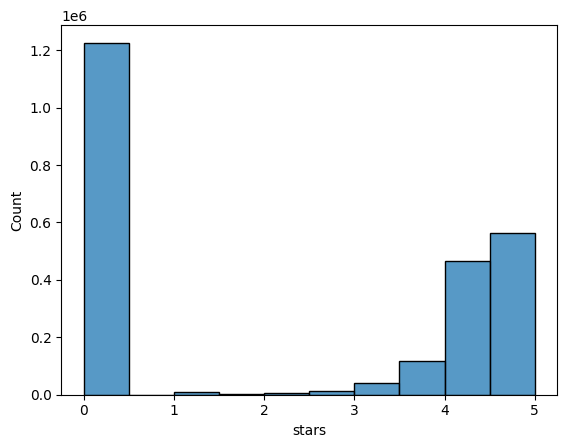

In [108]:
# 3.4 Visualizations

sns.histplot(df.stars, bins=10)
plt.show()

In [ ]:
# The most common value for the ratings of the distribution with 0.0 is 0.

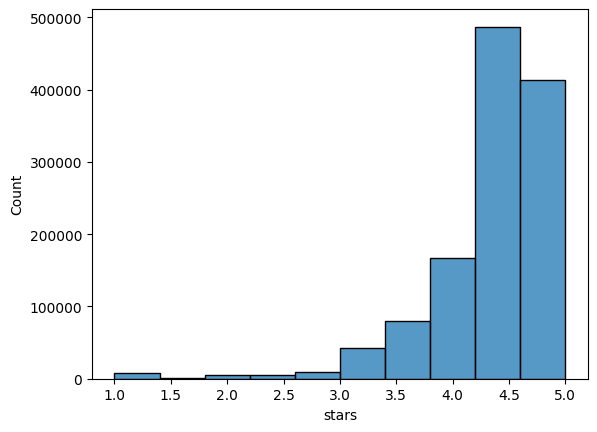

In [107]:
# Just out of curiosity:

sns.histplot(df3.stars, bins=10)
plt.show()